In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10,18)})
sns.set_theme(style="whitegrid")

# Loading the datasets

In [13]:
DATASETS_DIR = '../dados/subprefeituras-destino/'
DATASETS = ['São Mateus', 'Vila Mariana', 'Jabaquara', 'Cidade Ademar', 'Itaim Paulista', "M'Boi Mirim", 'Pinheiros', 'São Miguel', 'Capela do Socorro', 'Vila Maria/Vila Guilherme', 'Sé', 'Santo Amaro', 'Lapa', 'Freguesia do Ó', 'Campo Limpo', 'Guaianases', 'Penha', 'Cidade Tiradentes', 'Aricanduva', 'Jaçanã', 'Perus', 'Sapopemba', 'Casa Verde', 'Mooca', 'Vila Prudente', 'Ipiranga', 'Parelheiros', 'Ermelino Matarazzo', 'Santana', 'Butantã', 'Pirituba', 'Itaquera']

dfs = {df_name: pd.read_csv(f"{DATASETS_DIR}{df_name.replace(' ', '_').replace('/', '_')}.csv") for df_name in DATASETS}

# Total entries in the datasets

[Text(0.5, 1.0, 'Pesquisa Origem-Destino 2017')]

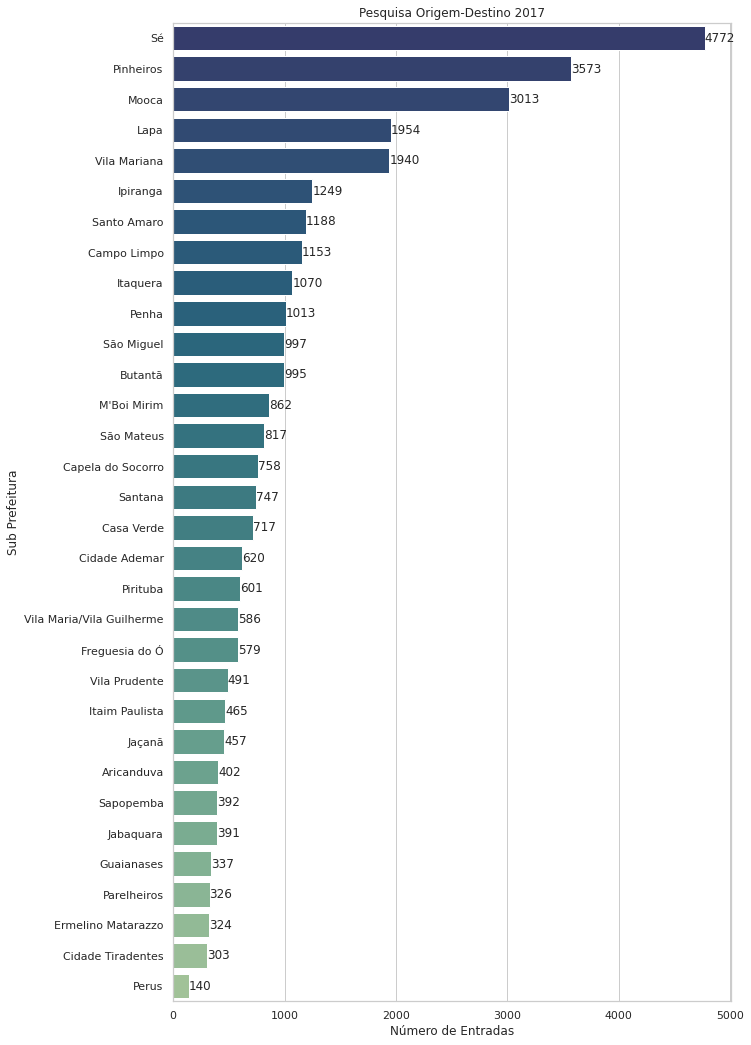

In [14]:
entries = pd.DataFrame({'Sub Prefeitura': dfs.keys(), 'Número de Entradas': [len(df) for df in dfs.values()]})

ax = sns.barplot(y='Sub Prefeitura', x='Número de Entradas', 
            data=entries.sort_values(by=['Número de Entradas'], 
            ascending=False), palette="crest_r")

ax.bar_label(ax.containers[0])
ax.set(title='Pesquisa Origem-Destino 2017')

# Total number of trips (using `FE_VIA`)

After removing incomplete trips we can use the factor of expansion `FE_VIA` to compute the total number of trips in the city in a regular day. We simply sum this attribute for all given entries.

[Text(0.5, 1.0, 'Pesquisa Origem-Destino 2017')]

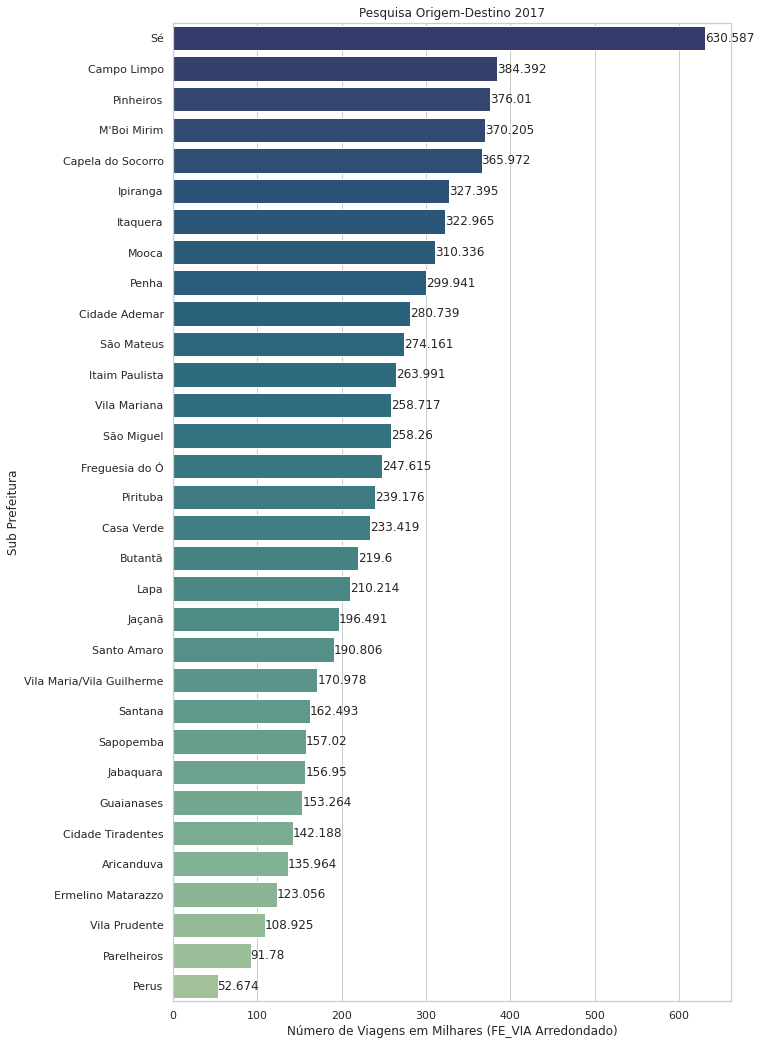

In [15]:
expanded_trips = [df[['FE_VIA']].astype(int).sum()[0]/1000 for df in dfs.values()]

trips = pd.DataFrame({'Sub Prefeitura': dfs.keys(), 'Número de Viagens em Milhares (FE_VIA Arredondado)': expanded_trips})

ax = sns.barplot(y='Sub Prefeitura', x='Número de Viagens em Milhares (FE_VIA Arredondado)', 
            data=trips.sort_values(by=['Número de Viagens em Milhares (FE_VIA Arredondado)'], 
            ascending=False), palette="crest_r")

ax.bar_label(ax.containers[0])
ax.set(title='Pesquisa Origem-Destino 2017')


# Attribute `SEXO` Analysis

In [16]:
male = {df_name: df.loc[df['SEXO'] == 1.0] for df_name, df in dfs.items()}
female = {df_name: df.loc[df['SEXO'] == 2.0] for df_name, df in dfs.items()}

/tmp/ipykernel_86409/3113713169.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entries = male_entries.append(female_entries)


[Text(0.5, 1.0, 'Pesquisa Origem-Destino 2017')]

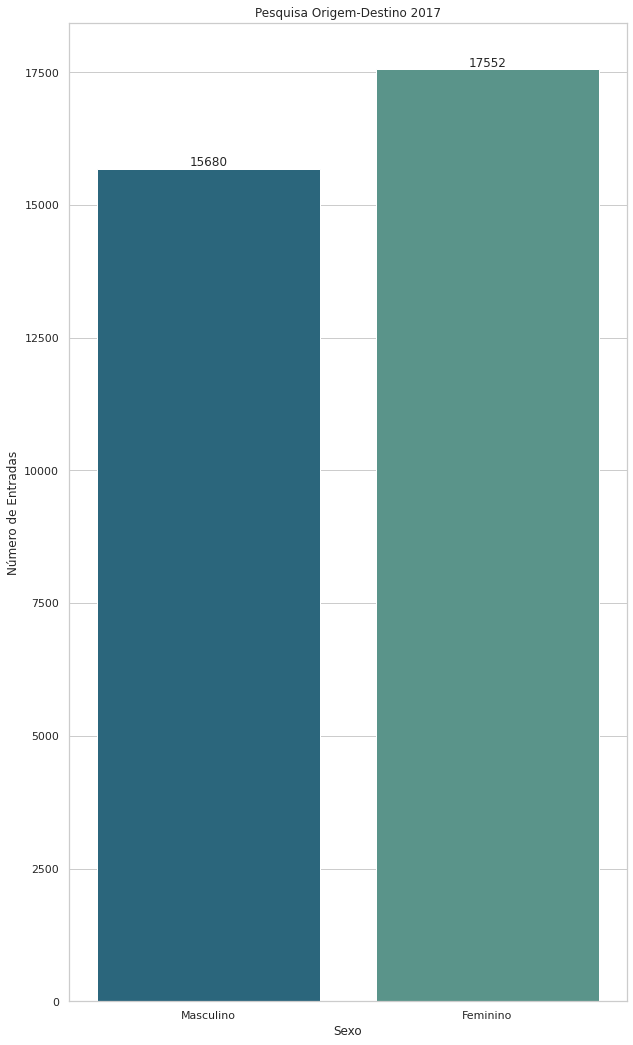

In [17]:
male_entries = pd.DataFrame({'Número de Entradas': [sum([len(df) for df in male.values()])], 'Sexo': 'Masculino'})
female_entries = pd.DataFrame({ 'Número de Entradas': [sum([len(df) for df in female.values()])], 'Sexo': 'Feminino'})
entries = male_entries.append(female_entries)

ax = sns.barplot(x='Sexo', y='Número de Entradas', ci=None,
            data=entries, palette="crest_r")

ax.bar_label(ax.containers[0])
ax.set(title='Pesquisa Origem-Destino 2017')

## Number of entries by `SEXO` in the datasets

/tmp/ipykernel_86409/3703492391.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entries = male_entries.append(female_entries)


[Text(0.5, 1.0, 'Pesquisa Origem-Destino 2017')]

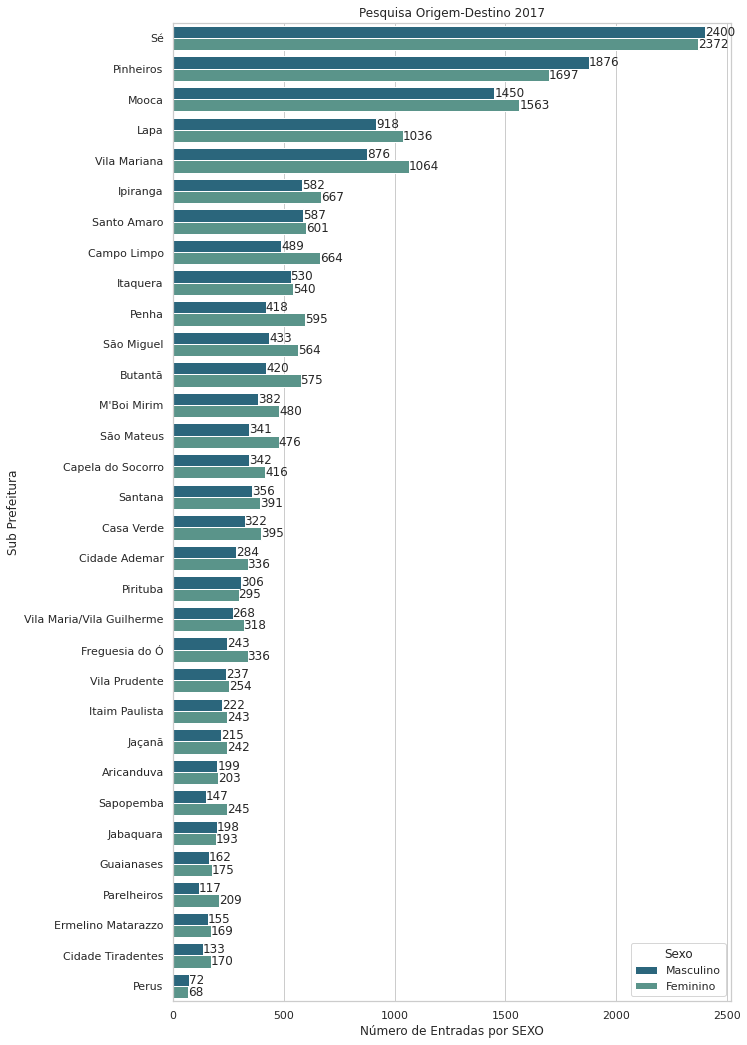

In [18]:
male_entries = pd.DataFrame({'Sub Prefeitura': dfs.keys(), 'Número de Entradas por SEXO': [len(df) for df in male.values()], 'Sexo': 'Masculino'})
female_entries = pd.DataFrame({'Sub Prefeitura': dfs.keys(), 'Número de Entradas por SEXO': [len(df) for df in female.values()], 'Sexo': 'Feminino'})

entries = male_entries.append(female_entries)
order = entries.groupby(['Sub Prefeitura'])['Número de Entradas por SEXO'].aggregate(np.sum).reset_index().sort_values(by='Número de Entradas por SEXO', ascending=False)

ax = sns.barplot(y='Sub Prefeitura', x='Número de Entradas por SEXO', hue='Sexo',
            data=entries, order=order['Sub Prefeitura'], palette="crest_r")

for container in ax.containers:
    ax.bar_label(container)
ax.set(title='Pesquisa Origem-Destino 2017')

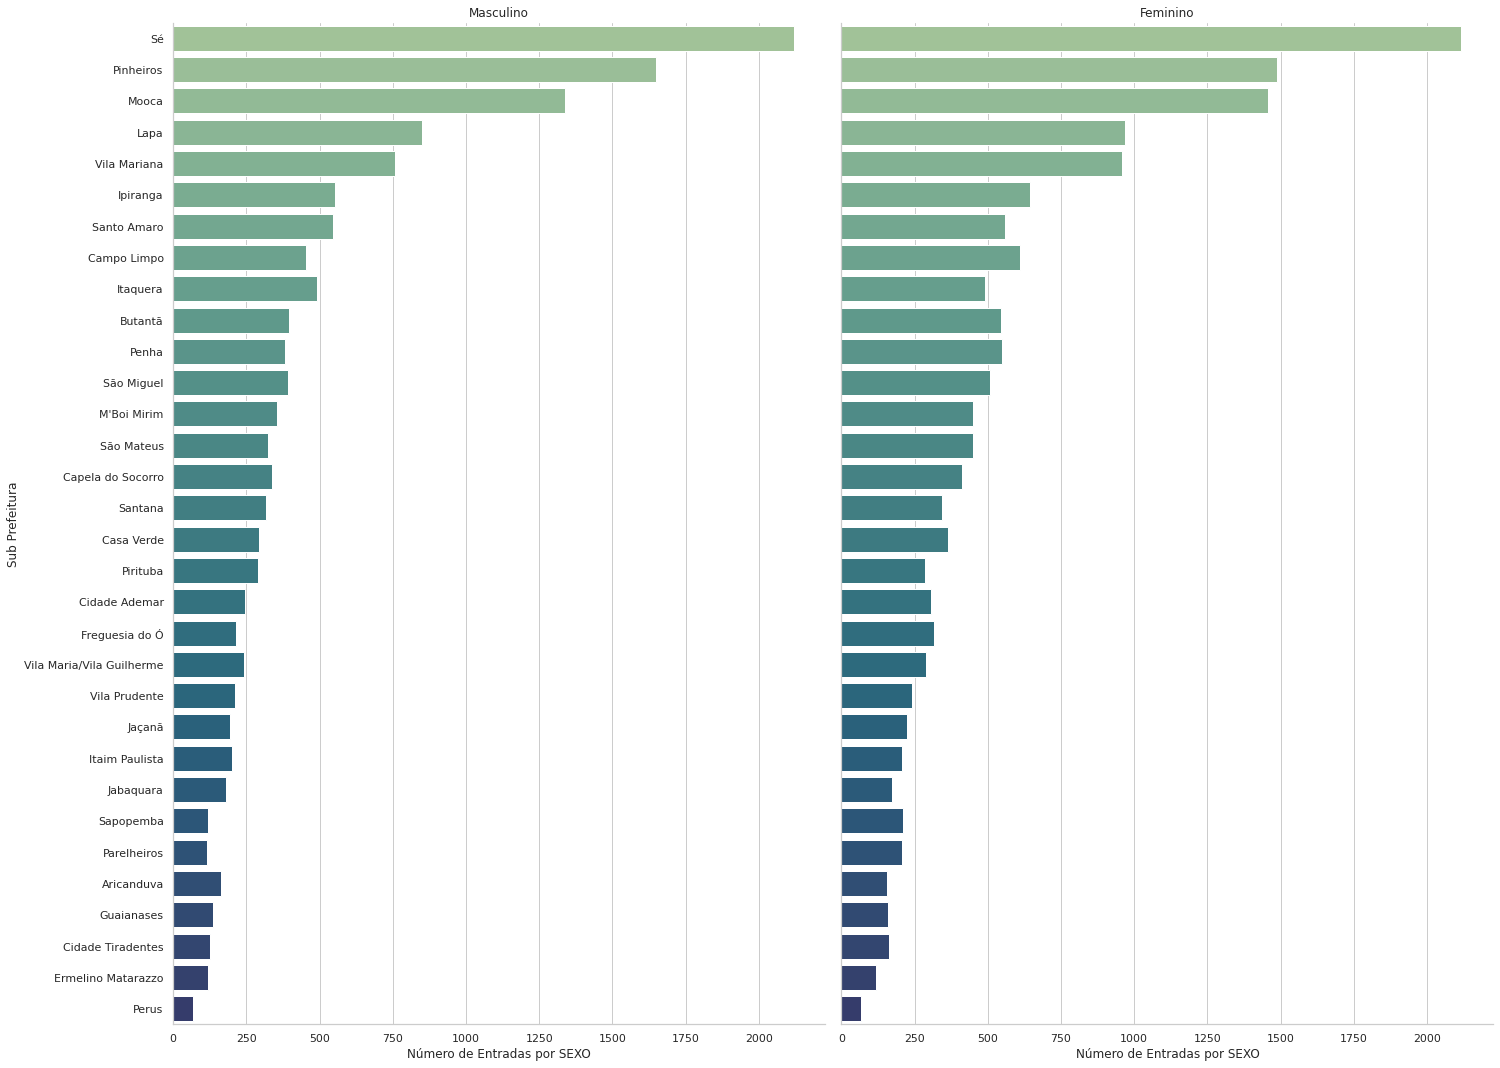

In [13]:
g = sns.catplot(y="Sub Prefeitura", x="Número de Entradas por SEXO", col="Sexo",
                data=entries, order=order["Sub Prefeitura"], kind="bar", palette="crest", height=15, aspect=0.7)

g.set_titles("{col_name}")

## Number of trips by `SEXO` (using `FE_VIA`)

/tmp/ipykernel_59195/2892454075.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips = male_trips.append(female_trips)


[Text(0.5, 1.0, 'Pesquisa Origem-Destino 2017')]

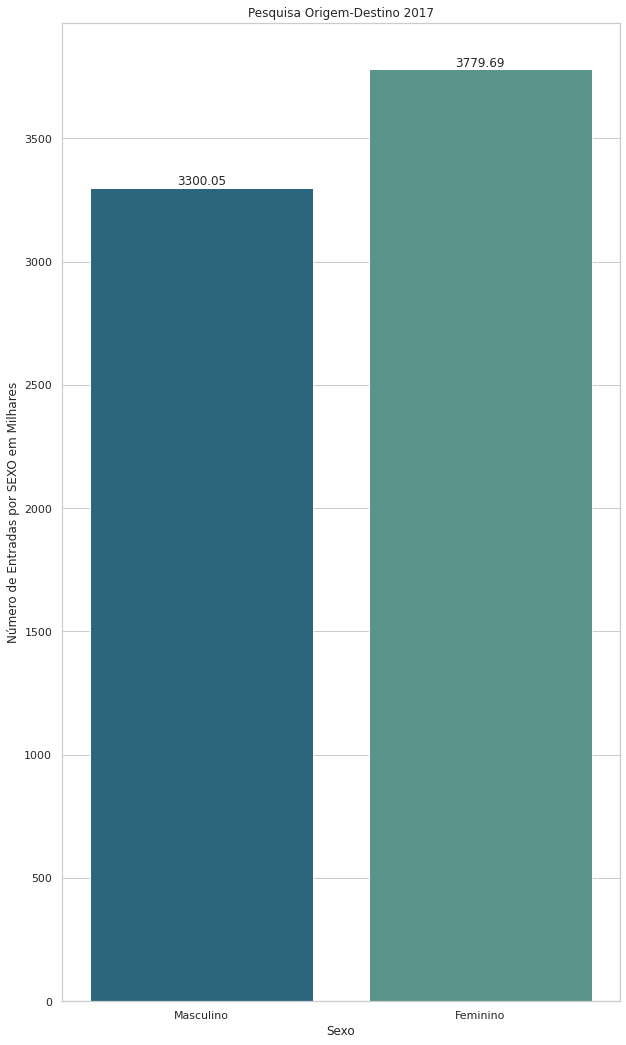

In [14]:
m_expanded_trips = [df[['FE_VIA']].astype(int).sum()[0]/1000 for df in male.values()]
f_expanded_trips = [df[['FE_VIA']].astype(int).sum()[0]/1000 for df in female.values()]

male_trips = pd.DataFrame({'Número de Entradas por SEXO em Milhares': [sum(m_expanded_trips)], 'Sexo': 'Masculino'})
female_trips = pd.DataFrame({'Número de Entradas por SEXO em Milhares': [sum(f_expanded_trips)], 'Sexo': 'Feminino'})
trips = male_trips.append(female_trips)


ax = sns.barplot(x='Sexo', y='Número de Entradas por SEXO em Milhares', ci=None,
            data=trips, palette="crest_r")

ax.bar_label(ax.containers[0])
ax.set(title='Pesquisa Origem-Destino 2017')

/tmp/ipykernel_59195/3675272504.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips = male_trips.append(female_trips)


[Text(0.5, 1.0, 'Pesquisa Origem-Destino 2017')]

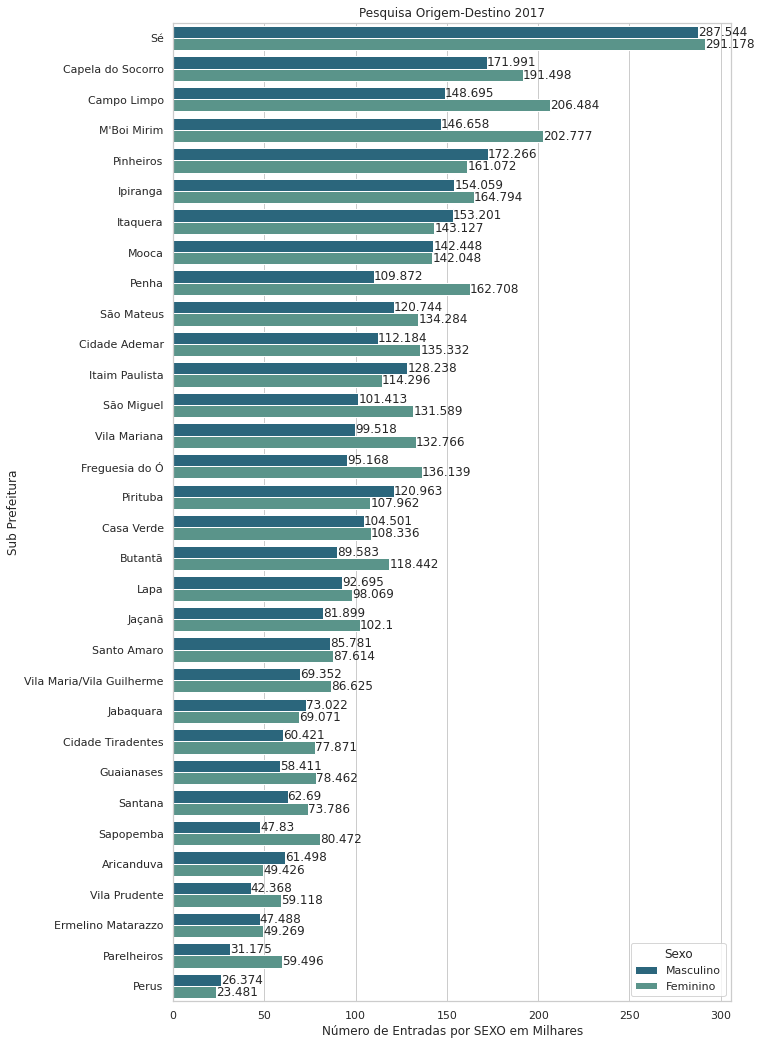

In [15]:
m_expanded_trips = [df[['FE_VIA']].astype(int).sum()[0]/1000 for df in male.values()]
f_expanded_trips = [df[['FE_VIA']].astype(int).sum()[0]/1000 for df in female.values()]


male_trips = pd.DataFrame({'Sub Prefeitura': dfs.keys(), 'Número de Entradas por SEXO em Milhares': m_expanded_trips, 'Sexo': 'Masculino'})
female_trips = pd.DataFrame({'Sub Prefeitura': dfs.keys(), 'Número de Entradas por SEXO em Milhares': f_expanded_trips, 'Sexo': 'Feminino'})

trips = male_trips.append(female_trips)
order = trips.groupby(['Sub Prefeitura'])['Número de Entradas por SEXO em Milhares'].aggregate(np.sum).reset_index().sort_values(by='Número de Entradas por SEXO em Milhares', ascending=False)


ax = sns.barplot(y='Sub Prefeitura', x='Número de Entradas por SEXO em Milhares', hue='Sexo',
            data=trips, order=order["Sub Prefeitura"], palette="crest_r")

for container in ax.containers:
    ax.bar_label(container)
ax.set(title='Pesquisa Origem-Destino 2017')

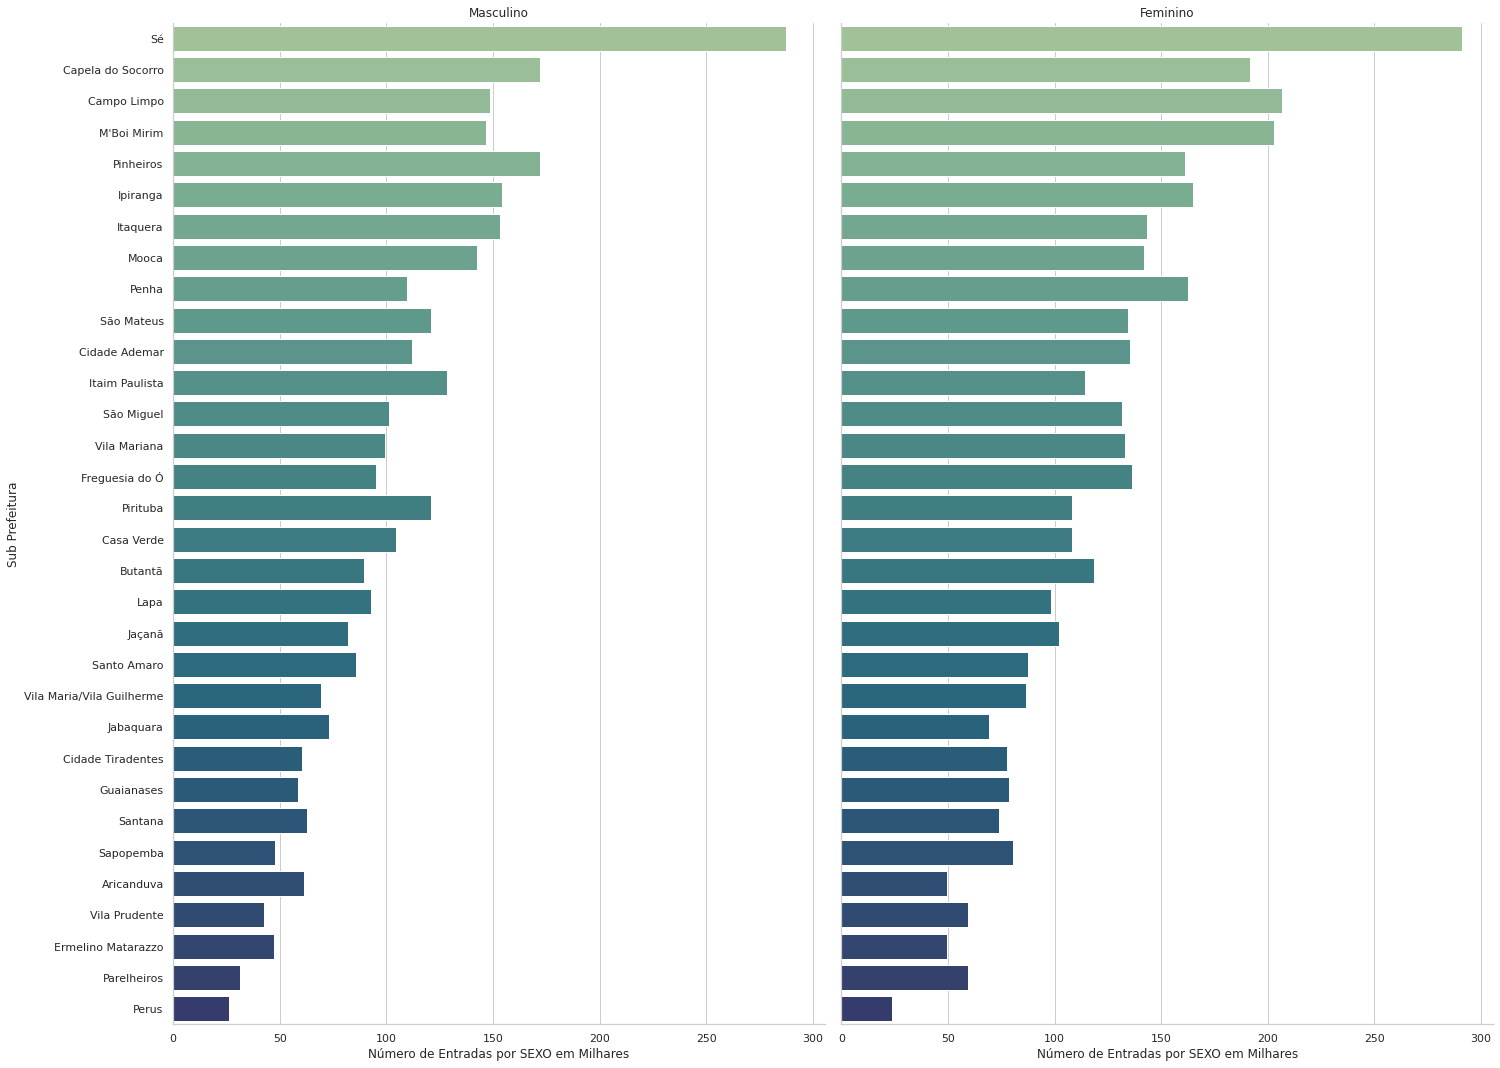

In [17]:
g = sns.catplot(y="Sub Prefeitura", x="Número de Entradas por SEXO em Milhares", col="Sexo",
                data=trips, order=order["Sub Prefeitura"], kind="bar", palette="crest", height=15, aspect=0.7)

g.set_titles("{col_name}")

## Absolute difference between trips by `SEXO`

[Text(0.5, 1.0, 'Pesquisa Origem-Destino 2017')]

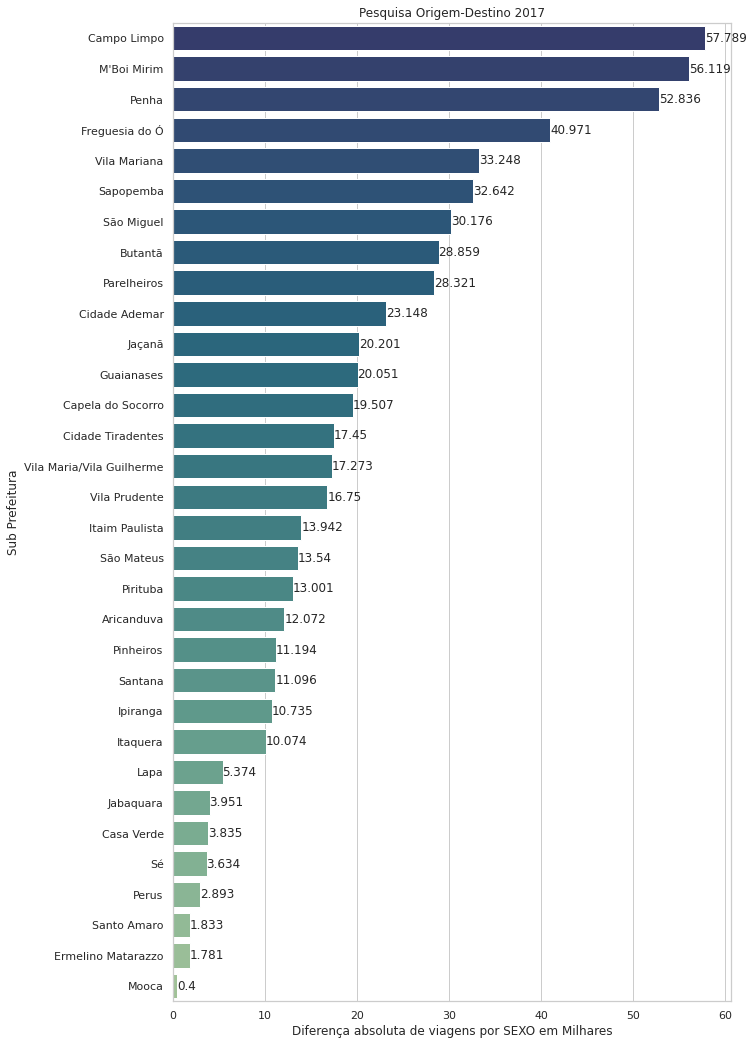

In [24]:
m_expanded_trips = [df[['FE_VIA']].astype(int).sum()[0]/1000 for df in male.values()]
f_expanded_trips = [df[['FE_VIA']].astype(int).sum()[0]/1000 for df in female.values()]

diff_trips = [abs(f_expanded_trips[i] - m_expanded_trips[i]) for i in range(len(m_expanded_trips))]

trips = pd.DataFrame({'Sub Prefeitura': dfs.keys(), 'Diferença absoluta de viagens por SEXO em Milhares': diff_trips})
order = trips.groupby(['Sub Prefeitura'])['Diferença absoluta de viagens por SEXO em Milhares'].aggregate(np.sum).reset_index().sort_values(by='Diferença absoluta de viagens por SEXO em Milhares', ascending=False)

ax = sns.barplot(y='Sub Prefeitura', x='Diferença absoluta de viagens por SEXO em Milhares',
                 data=trips, order=order['Sub Prefeitura'], palette="crest_r")

for container in ax.containers:
    ax.bar_label(container)
ax.set(title='Pesquisa Origem-Destino 2017')